# Image analysis using Fourier transforms

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

## 1. Fourier transform of a disc

https://www.geeksforgeeks.org/python-pil-imagedraw-draw-ellipse/

In [3]:
im1 = Image.new(mode="RGB", size=(300, 300))

draw = ImageDraw.Draw(im1)

draw.ellipse((100, 50, 200, 250), fill=(255, 0, 0), outline=(0, 0, 0))

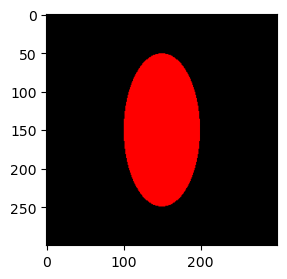

In [5]:
plt.figure(figsize=(4,3))

plt.imshow(im1)

plt.show()

In [11]:
print(np.array(im1).shape)

print(np.array(im1)[:,:,0].shape)

# Select the R channel

im1_red = np.array(im1)[:,:,0]

print(np.max(im1_red), np.min(im1_red))

(300, 300, 3)
(300, 300)
255 0


In [12]:
type(im1)

# Binary image
image_1 = im1_red//255

print(image_1.shape)

print(np.unique(image_1))

(300, 300)
[0 1]


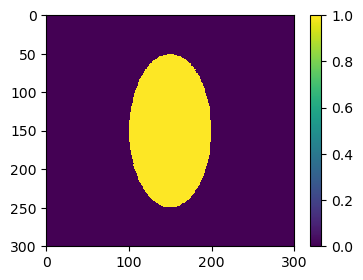

In [13]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(image_1, shading='auto', cmap = "viridis", vmin = 0, vmax=1)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

## Fourier transform of the disc

In [14]:
fourier_1 = np.fft.fft2(image_1)

shifted_fourier_1 = np.fft.fftshift(fourier_1)

norm_fourier_1 = np.abs(shifted_fourier_1)

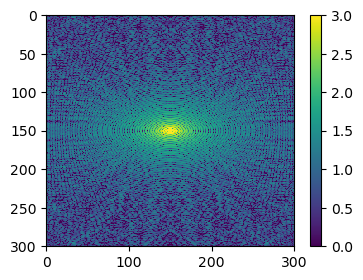

In [15]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(norm_fourier_1), shading='auto', cmap = "viridis", vmin = 0, vmax=3)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

## 2. Fourier transform of a block

https://www.geeksforgeeks.org/python-pil-imagedraw-draw-line/

In [16]:
im2 = Image.new(mode="RGB",size=(300, 300))

draw = ImageDraw.Draw(im2)

draw.line((200, 200, 100, 100), fill=(255, 255, 0), width=10)

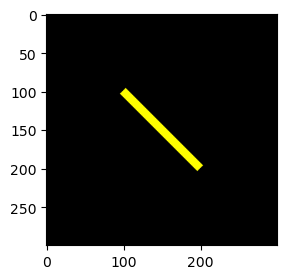

In [19]:
plt.figure(figsize=(4,3))

plt.imshow(im2)

plt.show()

In [20]:
image_2 = np.array(im2)[:,:,0]//255

print(np.max(image_2))

print(np.min(image_2))

1
0


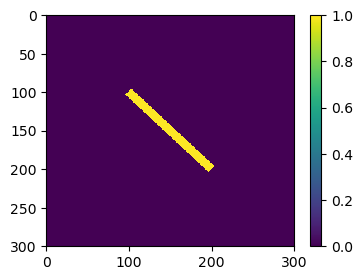

In [21]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(image_2, shading='auto', cmap = "viridis", vmin = 0, vmax=1)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

In [22]:
fourier_2 = np.fft.fft2(image_2)

shifted_fourier_2 = np.fft.fftshift(fourier_2)

norm_fourier_2 = np.abs(shifted_fourier_2)

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_49695/4162900590.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(norm_fourier_2), shading='auto', cmap = "viridis", vmin = 0, vmax=3)
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_49695/4162900590.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


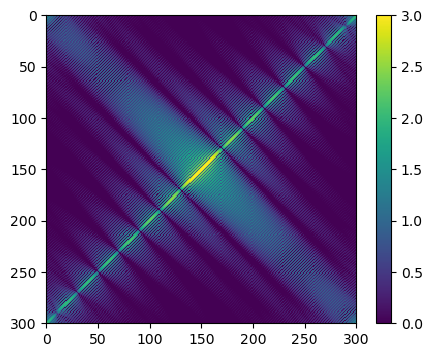

In [23]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(norm_fourier_2), shading='auto', cmap = "viridis", vmin = 0, vmax=3)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

## 3. Fourier transform of a Rubik's cube

In [25]:
import matplotlib.image as mpimg

In [29]:
# Read image:

img = mpimg.imread("../sample-data/Rubiks_cube.jpg")

print(img.shape)

(1600, 1600, 3)


In [30]:
# 2D image:

image_3 = img[:,:,0]
print(image_3.shape)

(1600, 1600)


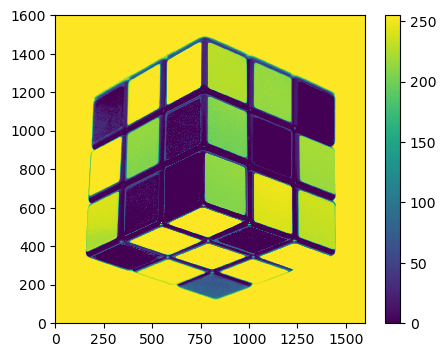

In [31]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(image_3, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

### Fourier transform:

In [32]:
fourier_3 = np.fft.fft2(image_3)

shifted_fourier_3 = np.fft.fftshift(fourier_3)

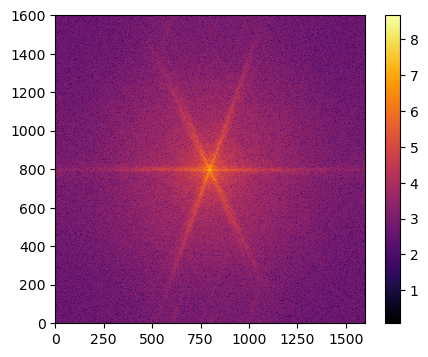

In [33]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(shifted_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Low-pass filter:

We need to construct a mask.

In [58]:
image_centre = [shifted_fourier_3.shape[0]//2, shifted_fourier_3.shape[1]//2]

print(image_centre)

radius_centre = 50 #pixels

[800, 800]


In [59]:
mask_1 = Image.new(mode="RGB", size=(1600, 1600))

draw = ImageDraw.Draw(mask_1)

draw.ellipse((image_centre[0]-radius_centre, image_centre[1]-radius_centre, image_centre[0]+radius_centre, image_centre[1]+radius_centre), fill=(255, 0, 0), outline=(0, 0, 0))

255 0


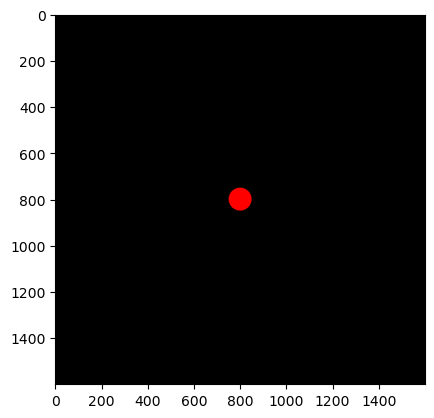

In [60]:
%matplotlib inline
plt.imshow(mask_1)

print(np.max(mask_1), np.min(mask_1))

In [61]:
mask_1 = np.array(mask_1)[:,:,0]//255

print(np.unique(mask_1))

[0 1]


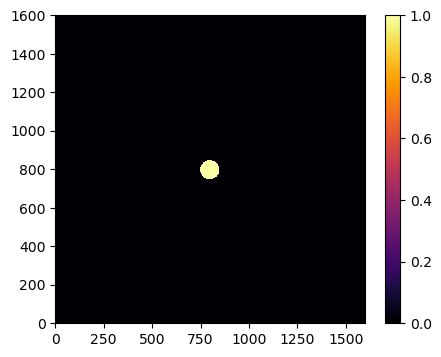

In [62]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(mask_1, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Multiply the mask by the fourier image

In [63]:
masked_fourier_3 = shifted_fourier_3*mask_1

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_49695/2595529218.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_49695/2595529218.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


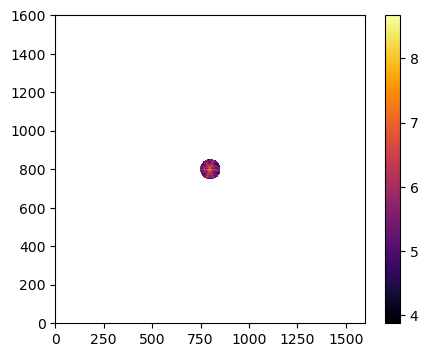

In [64]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Inverse Fourier transform of the masked Fourier |image

In [65]:
inv_filter_3 = np.fft.ifftshift(masked_fourier_3)
inv_filter_3 = np.fft.ifft2(inv_filter_3)

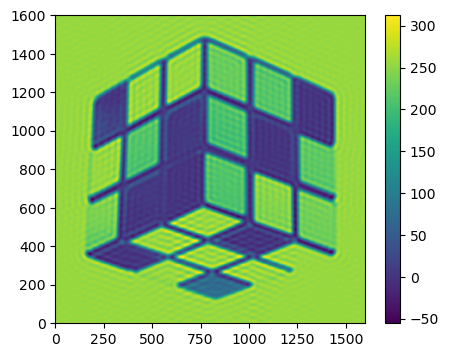

In [66]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(inv_filter_3.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

### HIgh pass filter:

Removes low frequency (large scale) structures.

In [68]:
mask_2 = - mask_1 + 1

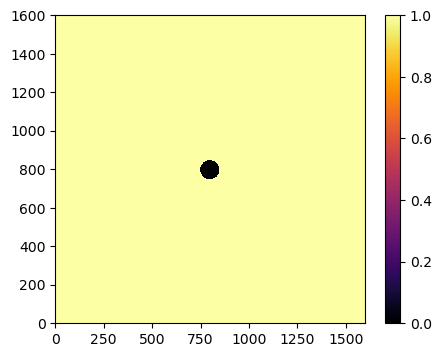

In [69]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(mask_2, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Multiply mask 2 by the fourier image:

In [70]:
masked_fourier_3_2 = shifted_fourier_3*mask_2

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_49695/793016055.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3_2)), shading='auto', cmap ="inferno")
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_49695/793016055.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


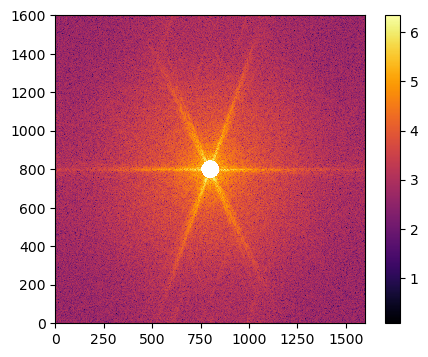

In [71]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3_2)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [72]:
inv_filter_3_2 = np.fft.ifftshift(masked_fourier_3_2)
inv_filter_3_2 = np.fft.ifft2(inv_filter_3_2)

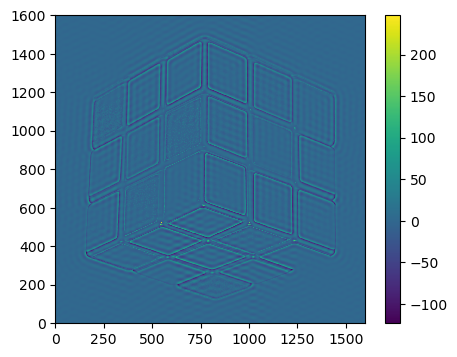

In [73]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(inv_filter_3_2.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

## 4. Fourier transform of 2D noise:

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [74]:
noise_array = np.random.randn(300, 300)

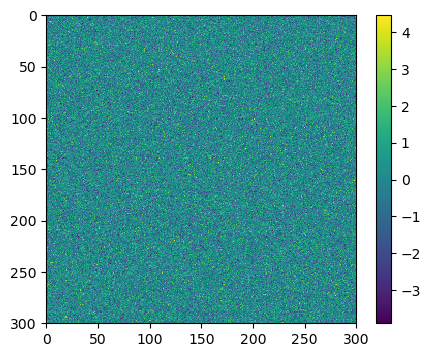

In [75]:
plt.figure(figsize = (5,4))
plt.gca().invert_yaxis()
Z1 = plt.pcolor(noise_array, shading='auto', cmap = "viridis")#, vmin = 0, vmax=3)

plt.colorbar(Z1)

plt.show()

### Fourier transform of the 2D noise:

In [76]:
fourier_4 = np.fft.fft2(noise_array)

shifted_fourier_4 = np.fft.fftshift(fourier_4)

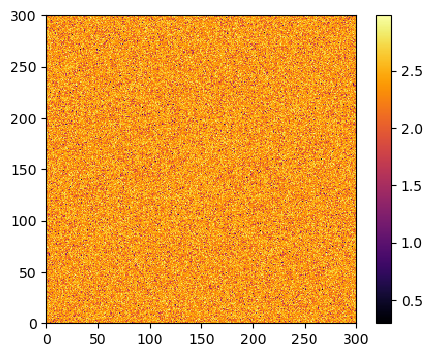

In [77]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(fourier_4)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()